In [5]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def createGraphs(xVec, yVecs, legendLabels, title, xLabel, yLabel, fileName=None):
    """
    xVec        : List containing the x-values for our plot
    yVecs       : List of Lists that contain the different items we want to plot
    legendLabels: List of labels for the graph. Must be the same length as yVecs.
    title       : Title of the plot
    xLabel      : Label for the x-axis
    yLabel      : Label for the y-axis
    fileName    : Name of the file we want to save to. If None, then we do not 
        save to a file and instead just display.
    """
    if(len(yVecs) != len(legendLabels)):
        print("yVecs and legendLabels do not have the same length")
        return
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    numYVecs = len(yVecs)
    for i in range(numYVecs):
        ax.plot(xVec, yVecs[i], label=legendLabels[i])
    ax.legend()
    fig.show()
    if (fileName != None):
        fig.savefig(fileName)

def createGraphs2(xVec, yVecs, legendLabels, title, xLabel, yLabel, fileName=None, yticks=None, colors=None):
    """
    xVec        : List containing the x-values for our plot
    yVecs       : List of Lists that contain the different items we want to plot
                    yVecs[i] is a list of experiments ran for one function call
                    yVecs[i,j] is a list of outputs of one experiment at xVec[j]
                    yVecs[i,j,k] is an instantiation of an experiment
    legendLabels: List of labels for the graph. Must be the same length as yVecs.
    title       : Title of the plot
    xLabel      : Label for the x-axis
    yLabel      : Label for the y-axis
    fileName    : Name of the file we want to save to. If None, then we do not 
        save to a file and instead just display.
    """
    if(len(yVecs) != len(legendLabels)):
        print("yVecs and legendLabels do not have the same length")
        return
    if(colors == None):
        #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    
    numYVecs = len(yVecs)
    for i in range(numYVecs):
        # Generate quantile information
        lowQ = []
        highQ= []
        med  = []
        for j in range(len(xVec)):
            lowQ.append(np.quantile(yVecs[i][j], .25))
            highQ.append(np.quantile(yVecs[i][j], .75))
            med.append(np.quantile(yVecs[i][j], .5))
        ax.plot(xVec, lowQ, '--', color=colors[i])
        ax.plot(xVec, highQ, '--', color=colors[i])
        ax.plot(xVec, med, color=colors[i], label=legendLabels[i])
    ax.legend()
    if (yticks != None):
        plt.yticks(yticks)
    fig.show()
    if (fileName != None):
        fig.savefig(fileName)

/tmp/ipykernel_11697/664932449.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_11697/664932449.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


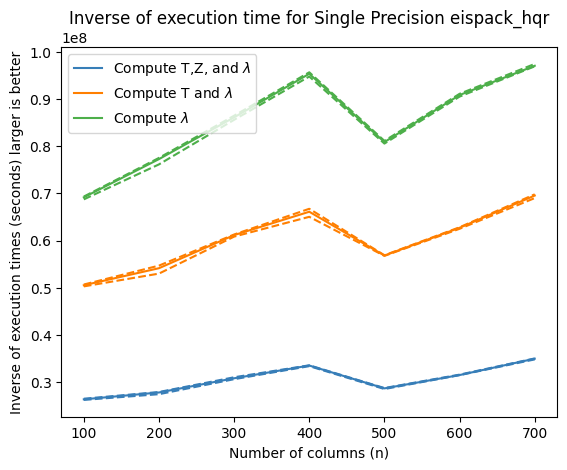

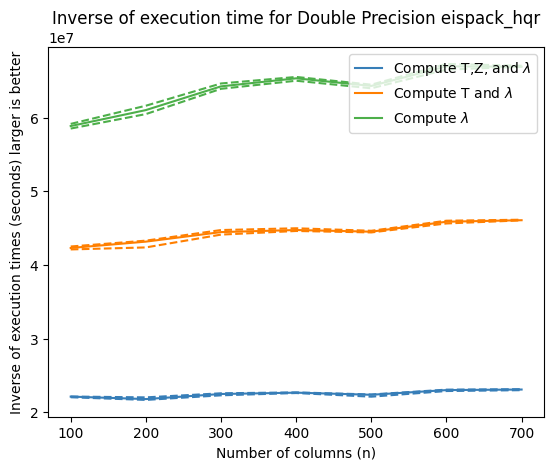

In [50]:
file = open("experiments.txt")
lines = file.readlines()
nVec = []
optTime = []
refTime = []
tTime = []
eTime = []
# Since we are comparing iterative methods, it doesn't make sence to discuss performance, but
# we still look at the inverse of time scaled down by n^3 to attempt to linearize the data 
# making it easier to visually inspect

timeSingleVecs = [[], [], []]
timeDoubleVecs = [[], [], []]
timeVecs = [timeSingleVecs, timeDoubleVecs]
labelVec = ["Compute T,Z, and $\\lambda$", "Compute T and $\\lambda$", "Compute $\\lambda$"]

for j in range(len(lines)):
    line = lines[j]
    if (line[0] == 'R' or line[0] == 'm'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    if (line[0] == 'S'):
        index2 = 0
        continue
    if (line[0] == 'D'):
        index2 = 1
        continue
    lineVec = line.split(":")
    source = lineVec[0]
    if (source == 'TQE'):
        index = 0
    elif (source == 'TE'):
        index = 1
    elif (source == 'E'):
        index = 2
    value = nVec[-1]**3 / float(lineVec[1])
    if (value == 0):
        continue
    if (len(nVec) > len(timeVecs[index2][index])):
        timeVecs[index2][index].append([value])
    else:
        timeVecs[index2][index][-1].append(value)
    time = value
createGraphs2(nVec, timeSingleVecs, labelVec, "Inverse of execution time for Single Precision eispack_hqr", "Number of columns (n)", "Inverse of execution times (seconds) larger is better", "eispackHqrTlapackPerfSingle.pdf")
createGraphs2(nVec, timeDoubleVecs, labelVec, "Inverse of execution time for Double Precision eispack_hqr", "Number of columns (n)", "Inverse of execution times (seconds) larger is better", "eispackHqrTlapackPerfDouble.pdf")